# Work with climate model data using `xarray`, `dask` and `cartopy`
----

Create by: @vichawans

Adapt from: [Project Pythia](https://foundations.projectpythia.org/core/xarray/xarray-intro.html)




# Introduction to Xarray

---

## Overview

The examples in this tutorial focus on the fundamentals of working with gridded, labeled data using Xarray. Xarray works by introducing additional abstractions into otherwise ordinary data arrays. In this tutorial, we demonstrate the usefulness of these abstractions. The examples in this tutorial explain how the proper usage of Xarray abstractions generally leads to simpler, more robust code.

The following topics will be covered in this tutorial:

1. Open netCDF data using Xarray
1. Basic subsetting and aggregation of a `Dataset`
1. Brief introduction to plotting with Xarray

---

## Imports

In earlier tutorials, we explained the abbreviation of commonly used scientific Python package names in import statements. Just as `numpy` is abbreviated `np`, and just as `pandas` is abbreviated `pd`, the name `xarray` is often abbreviated `xr` in import statements. In addition, we also import `pythia_datasets`, which provides sample data used in these examples.

In [12]:

import xarray as xr
from pythia_datasets import DATASETS

## Introducing the `DataArray` and `Dataset`

As stated in earlier tutorials, NumPy arrays contain many useful features, making NumPy an essential part of the scientific Python stack.  Xarray expands on these features, adding streamlined data manipulation capabilities. These capabilities are similar to those provided by Pandas, except that they are focused on gridded N-dimensional data instead of tabular data. 

Its interface is based largely on the netCDF data model (variables, attributes, and dimensions), but it goes beyond the traditional netCDF interfaces in order to provide additional useful functionality, similar to netCDF-java's [Common Data Model (CDM)](https://docs.unidata.ucar.edu/netcdf-java/current/userguide/common_data_model_overview.html). 

### A `DataArray` object

The `DataArray` in one of the most basic elements of Xarray; a `DataArray` object is similar to a numpy `ndarray` object. (For more information, see the documentation [here](http://xarray.pydata.org/en/stable/user-guide/data-structures.html#dataarray).) In addition to retaining most functionality from NumPy arrays, Xarray `DataArrays` provide two critical pieces of functionality:

1. Coordinate names and values are stored with the data, making slicing and indexing much more powerful.
2. Attributes, similar to those in netCDF files, can be stored in a container built into the `DataArray`.


### The `Dataset`: a container for `DataArray`s with shared coordinates

Along with the `DataArray`, the other main object type in Xarray is the `Dataset`.  `Datasets` are containers similar to Python dictionaries; each `Dataset` can hold one or more `DataArrays`. In addition, the `DataArrays` contained in a `Dataset` can share coordinates, although this behavior is optional.  (For more information, see the [official documentation page](http://xarray.pydata.org/en/stable/user-guide/data-structures.html#dataset).)

`Dataset` objects are most often created by loading data from a data file. 

## Opening netCDF data

Xarray has close ties to the netCDF data format; as such, netCDF was chosen as the premier data file format for Xarray. Hence, Xarray can easily open netCDF datasets, provided they conform to certain limitations (for example, 1-dimensional coordinates).

### Access netCDF data with `xr.open_dataset`

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Info</p>
    The data file for this example, <code>NARR_19930313_0000.nc</code>, is retrieved from Project Pythia's custom example data library.  The <code>DATASETS</code> class imported at the top of this page contains a <code>.fetch()</code> method, which retrieves, downloads, and caches a Pythia example data file.
</div>

In [2]:
filepath = DATASETS.fetch('NARR_19930313_0000.nc')

Once we have a valid path to a data file that Xarray knows how to read, we can open the data file and load it into Xarray; this is done by passing the path to Xarray's `open_dataset` method, as shown below:

In [3]:
ds = xr.open_dataset(filepath)
ds

<xarray.Dataset>
Dimensions:                       (time1: 1, isobaric1: 29, y: 119, x: 268)
Coordinates:
  * time1                         (time1) datetime64[ns] 1993-03-13
  * isobaric1                     (isobaric1) float32 100.0 125.0 ... 1e+03
  * y                             (y) float32 -3.117e+03 -3.084e+03 ... 714.1
  * x                             (x) float32 -3.324e+03 ... 5.343e+03
Data variables:
    u-component_of_wind_isobaric  (time1, isobaric1, y, x) float32 ...
    LambertConformal_Projection   int32 ...
    lat                           (y, x) float64 ...
    lon                           (y, x) float64 ...
    Geopotential_height_isobaric  (time1, isobaric1, y, x) float32 ...
    v-component_of_wind_isobaric  (time1, isobaric1, y, x) float32 ...
    Temperature_isobaric          (time1, isobaric1, y, x) float32 ...
Attributes:
    Originating_or_generating_Center:     US National Weather Service, Nation...
    Originating_or_generating_Subcenter:  North American Regional Reanalysis ...
    GRIB_table_version:                   0,131
    Generating_process_or_model:          North American Regional Reanalysis ...
    Conventions:                          CF-1.6
    history:                              Read using CDM IOSP GribCollection v3
    featureType:                          GRID
    History:                              Translated to CF-1.0 Conventions by...
    geospatial_lat_min:                   10.753308882144761
    geospatial_lat_max:                   46.8308828962289
    geospatial_lon_min:                   -153.88242040519995
    geospatial_lon_max:                   -42.666108129242815

### Subsetting the `Dataset`

Xarray's `open_dataset()` method, shown in the previous example, returns a `Dataset` object, which must then be assigned to a variable; in this case, we call the variable `ds`. Once the netCDF dataset is loaded into an Xarray `Dataset`, we can pull individual `DataArrays` out of the `Dataset`, using the technique described earlier in this tutorial.  In this example, we retrieve isobaric pressure data, as shown below:

In [4]:
ds.isobaric1

<xarray.DataArray 'isobaric1' (isobaric1: 29)>
array([ 100.,  125.,  150.,  175.,  200.,  225.,  250.,  275.,  300.,  350.,
        400.,  450.,  500.,  550.,  600.,  650.,  700.,  725.,  750.,  775.,
        800.,  825.,  850.,  875.,  900.,  925.,  950.,  975., 1000.],
      dtype=float32)
Coordinates:
  * isobaric1  (isobaric1) float32 100.0 125.0 150.0 175.0 ... 950.0 975.0 1e+03
Attributes:
    units:                   hPa
    long_name:               Isobaric surface
    positive:                down
    Grib_level_type:         100
    _CoordinateAxisType:     Pressure
    _CoordinateZisPositive:  down

(As described earlier in this tutorial, we can also use dictionary syntax to select specific `DataArrays`; in this case, we would write `ds['isobaric1']`.)

Many of the subsetting operations usable on `DataArrays` can also be used on `Datasets`.  However, when used on `Datasets`, these operations are performed on every `DataArray` in the `Dataset`, as shown below:

In [5]:
ds_1000 = ds.sel(isobaric1=1000.0)
ds_1000

<xarray.Dataset>
Dimensions:                       (time1: 1, y: 119, x: 268)
Coordinates:
  * time1                         (time1) datetime64[ns] 1993-03-13
    isobaric1                     float32 1e+03
  * y                             (y) float32 -3.117e+03 -3.084e+03 ... 714.1
  * x                             (x) float32 -3.324e+03 ... 5.343e+03
Data variables:
    u-component_of_wind_isobaric  (time1, y, x) float32 ...
    LambertConformal_Projection   int32 ...
    lat                           (y, x) float64 ...
    lon                           (y, x) float64 ...
    Geopotential_height_isobaric  (time1, y, x) float32 ...
    v-component_of_wind_isobaric  (time1, y, x) float32 ...
    Temperature_isobaric          (time1, y, x) float32 ...
Attributes:
    Originating_or_generating_Center:     US National Weather Service, Nation...
    Originating_or_generating_Subcenter:  North American Regional Reanalysis ...
    GRIB_table_version:                   0,131
    Generating_process_or_model:          North American Regional Reanalysis ...
    Conventions:                          CF-1.6
    history:                              Read using CDM IOSP GribCollection v3
    featureType:                          GRID
    History:                              Translated to CF-1.0 Conventions by...
    geospatial_lat_min:                   10.753308882144761
    geospatial_lat_max:                   46.8308828962289
    geospatial_lon_min:                   -153.88242040519995
    geospatial_lon_max:                   -42.666108129242815

As shown above, the subsetting operation performed on the `Dataset` returned a new `Dataset`.  If only a single `DataArray` is needed from this new `Dataset`, it can be retrieved using the familiar dot notation:

In [6]:
ds_1000.Temperature_isobaric

<xarray.DataArray 'Temperature_isobaric' (time1: 1, y: 119, x: 268)>
[31892 values with dtype=float32]
Coordinates:
  * time1      (time1) datetime64[ns] 1993-03-13
    isobaric1  float32 1e+03
  * y          (y) float32 -3.117e+03 -3.084e+03 -3.052e+03 ... 681.6 714.1
  * x          (x) float32 -3.324e+03 -3.292e+03 ... 5.311e+03 5.343e+03
Attributes:
    long_name:           Temperature @ Isobaric surface
    units:               K
    description:         Temperature
    grid_mapping:        LambertConformal_Projection
    Grib_Variable_Id:    VAR_7-15-131-11_L100
    Grib1_Center:        7
    Grib1_Subcenter:     15
    Grib1_TableVersion:  131
    Grib1_Parameter:     11
    Grib1_Level_Type:    100
    Grib1_Level_Desc:    Isobaric surface

### Aggregation operations

As covered earlier in this tutorial, you can use named dimensions in an Xarray `Dataset` to manually slice and index data.  However, these dimension names also serve an additional purpose: you can use them to specify dimensions to aggregate on.  There are many different aggregation operations available; in this example, we focus on `std` (standard deviation).

In [7]:
u_winds = ds['u-component_of_wind_isobaric']
u_winds.std(dim=['x', 'y'])

<xarray.DataArray 'u-component_of_wind_isobaric' (time1: 1, isobaric1: 29)>
array([[ 8.673963 , 10.212325 , 11.556413 , 12.254429 , 13.372146 ,
        15.472462 , 16.091969 , 15.846294 , 15.195834 , 13.936979 ,
        12.93888  , 12.060708 , 10.972139 ,  9.722328 ,  8.853286 ,
         8.257241 ,  7.679721 ,  7.4516497,  7.2352104,  7.039894 ,
         6.883371 ,  6.7821493,  6.7088237,  6.6865997,  6.7247376,
         6.745023 ,  6.6859775,  6.5107226,  5.972262 ]], dtype=float32)
Coordinates:
  * time1      (time1) datetime64[ns] 1993-03-13
  * isobaric1  (isobaric1) float32 100.0 125.0 150.0 175.0 ... 950.0 975.0 1e+03

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Info</p>
    Recall from previous tutorials that aggregations in NumPy operate over axes specified by numeric values. However, with Xarray objects, aggregation dimensions are instead specified through a list passed to the <code>dim</code> keyword argument.
</div>

For this set of examples, we will be using the sample dataset defined above.  The calculations performed in these examples compute the mean temperature profile, defined as temperature as a function of pressure, over Colorado.  For the purposes of these examples, the bounds of Colorado are defined as follows:
 * x: -182km to 424km
 * y: -1450km to -990km
    
This dataset uses a Lambert Conformal projection; therefore, the data values shown above are projected to specific latitude and longitude values.  In this example, these latitude and longitude values are 37°N to 41°N and 102°W to 109°W. Using the original data values and the `mean` aggregation function as shown below yields the following mean temperature profile data:

In [8]:
temps = ds.Temperature_isobaric
co_temps = temps.sel(x=slice(-182, 424), y=slice(-1450, -990))
prof = co_temps.mean(dim=['x', 'y'])
prof

<xarray.DataArray 'Temperature_isobaric' (time1: 1, isobaric1: 29)>
array([[215.078  , 215.76935, 217.243  , 217.82663, 215.83487, 216.10933,
        219.99902, 224.66118, 228.80576, 234.88701, 238.78503, 242.66309,
        246.44807, 249.26636, 250.84995, 253.37354, 257.0429 , 259.08398,
        260.97955, 262.98364, 264.82138, 266.5198 , 268.22467, 269.7471 ,
        271.18216, 272.66815, 274.13037, 275.54718, 276.97675]],
      dtype=float32)
Coordinates:
  * time1      (time1) datetime64[ns] 1993-03-13
  * isobaric1  (isobaric1) float32 100.0 125.0 150.0 175.0 ... 950.0 975.0 1e+03

## Plotting with Xarray

As demonstrated earlier in this tutorial, there are many benefits to storing data as Xarray `DataArrays` and `Datasets`. In this section, we will cover another major benefit: Xarray greatly simplifies plotting of data stored as `DataArrays` and `Datasets`. One advantage of this is that many common plot elements, such as axis labels, are automatically generated and optimized for the data being plotted.  The next set of examples demonstrates this and provides a general overview of plotting with Xarray.

### Simple visualization with `.plot()`

Similarly to [Pandas](../pandas/pandas), Xarray includes a built-in plotting interface, which makes use of [Matplotlib](../matplotlib) behind the scenes. In order to use this interface, you can call the `.plot()` method, which is included in every `DataArray`.

In this example, we show how to create a basic plot from a `DataArray`. In this case, we are using the `prof` `DataArray` defined above, which contains a Colorado mean temperature profile.

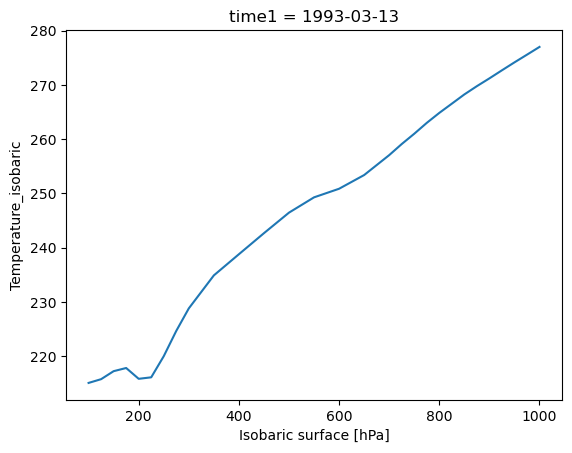

In [9]:
prof.plot()

In the figure shown above, Xarray has generated a line plot, which uses the mean temperature profile and the `'isobaric'` coordinate variable as axes. In addition, the axis labels and unit information have been read automatically from the `DataArray`'s metadata.

### Customizing the plot

As mentioned above, the `.plot()` method of Xarray `DataArrays` uses Matplotlib behind the scenes. Therefore, knowledge of Matplotlib can help you more easily customize plots generated by Xarray.

In this example, we need to customize the air temperature profile plot created above. There are two changes that need to be made:
- swap the axes, so that the Y (vertical) axis corresponds to isobaric levels
- invert the Y axis to match the model of air pressure decreasing at higher altitudes

We can make these changes by adding certain keyword arguments when calling `.plot()`, as shown below:

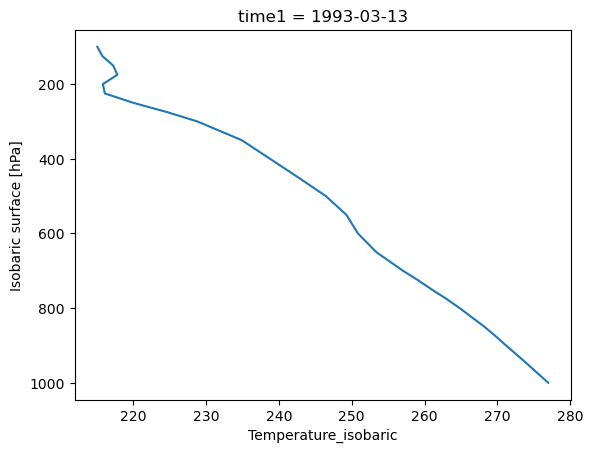

In [10]:
prof.plot(y="isobaric1", yincrease=False)

### Plotting 2-D data

In the previous example, we used `.plot()` to generate a plot from 1-D data, and the result was a line plot. In this section, we illustrate plotting of 2-D data.

In this example, we illustrate basic plotting of a 2-D array:

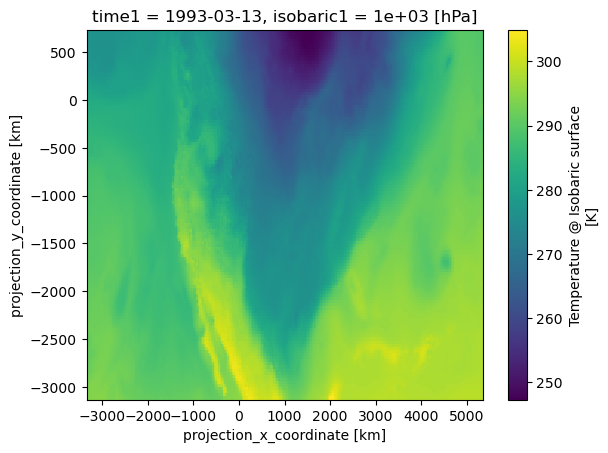

In [11]:
temps.sel(isobaric1=1000).plot()

The figure above is generated by Matplotlib's `pcolormesh` method, which was automatically called by Xarray's `plot` method.  This occurred because Xarray recognized that the `DataArray` object calling the `plot` method contained two distinct coordinate variables.

The plot generated by the above example is a map of air temperatures over North America, on the 1000 hPa isobaric surface. If a different map projection or added geographic features are needed on this plot, the plot can easily be modified using `cartopy`.

---